# Artificial Intelligence Project
## Facial Recognition
### The face_recognition library is a state-of-the-art face recognition built with deep learning. The model has an accuracy of 99.38%.


In [3]:
from PIL import Image, ImageDraw #python imaging libraries
from IPython.display import display
from resizeimage import resizeimage

print('A picture of Mark Zuckerburg')
pil_im = Image.open("the_zuck.jpg")
# resized_pil_im = resizeimage.resize_width(pil_im, 200)
# resized_pil_im = resizeimage.resize_height(pil_im, 200)
display(pil_im)

A picture of Mark Zuckerburg


FileNotFoundError: [Errno 2] No such file or directory: 'the_zuck.jpg'

FileNotFoundError: [Errno 2] No such file or directory: 'the_zuck.jpg'

# Learning from example
Now we show the library two famous faces and generate the encodings for them. Encoding is simply a low dimensional representation of a face that can be easily compared with other faces the library will recognize in the future.

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# Load a sample picture and learn how to recognize it.
idrisElba_image = face_recognition.load_image_file("idris_elba.jpg")
idrisElba_face_encoding = face_recognition.face_encodings(idrisElba_image)[0]

zuckerburg_image = face_recognition.load_image_file("the_zuck.jpg")
zuckerburg_face_encoding = face_recognition.face_encodings(zuckerburg_image)[0]

jimCarrey_image = face_recognition.load_image_file("jim_carrey.jpg")
jimCarrey_face_encoding = face_recognition.face_encodings(jimCarrey_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    idrisElba_face_encoding,
    zuckerburg_face_encoding,
    jimCarrey_face_encoding
]
known_face_names = [
    "Idris Elba",
    "Mark Zuckerburg",
    "Jim Carrey"
]
print('Finished encoding for', len(known_face_encodings), 'images.')

Finished encoding for 3 images.


# Showtime
Finally, we load the image we looked at in the first cell, find the faces in the image and compare them with the encodings the library generated in the previous step.

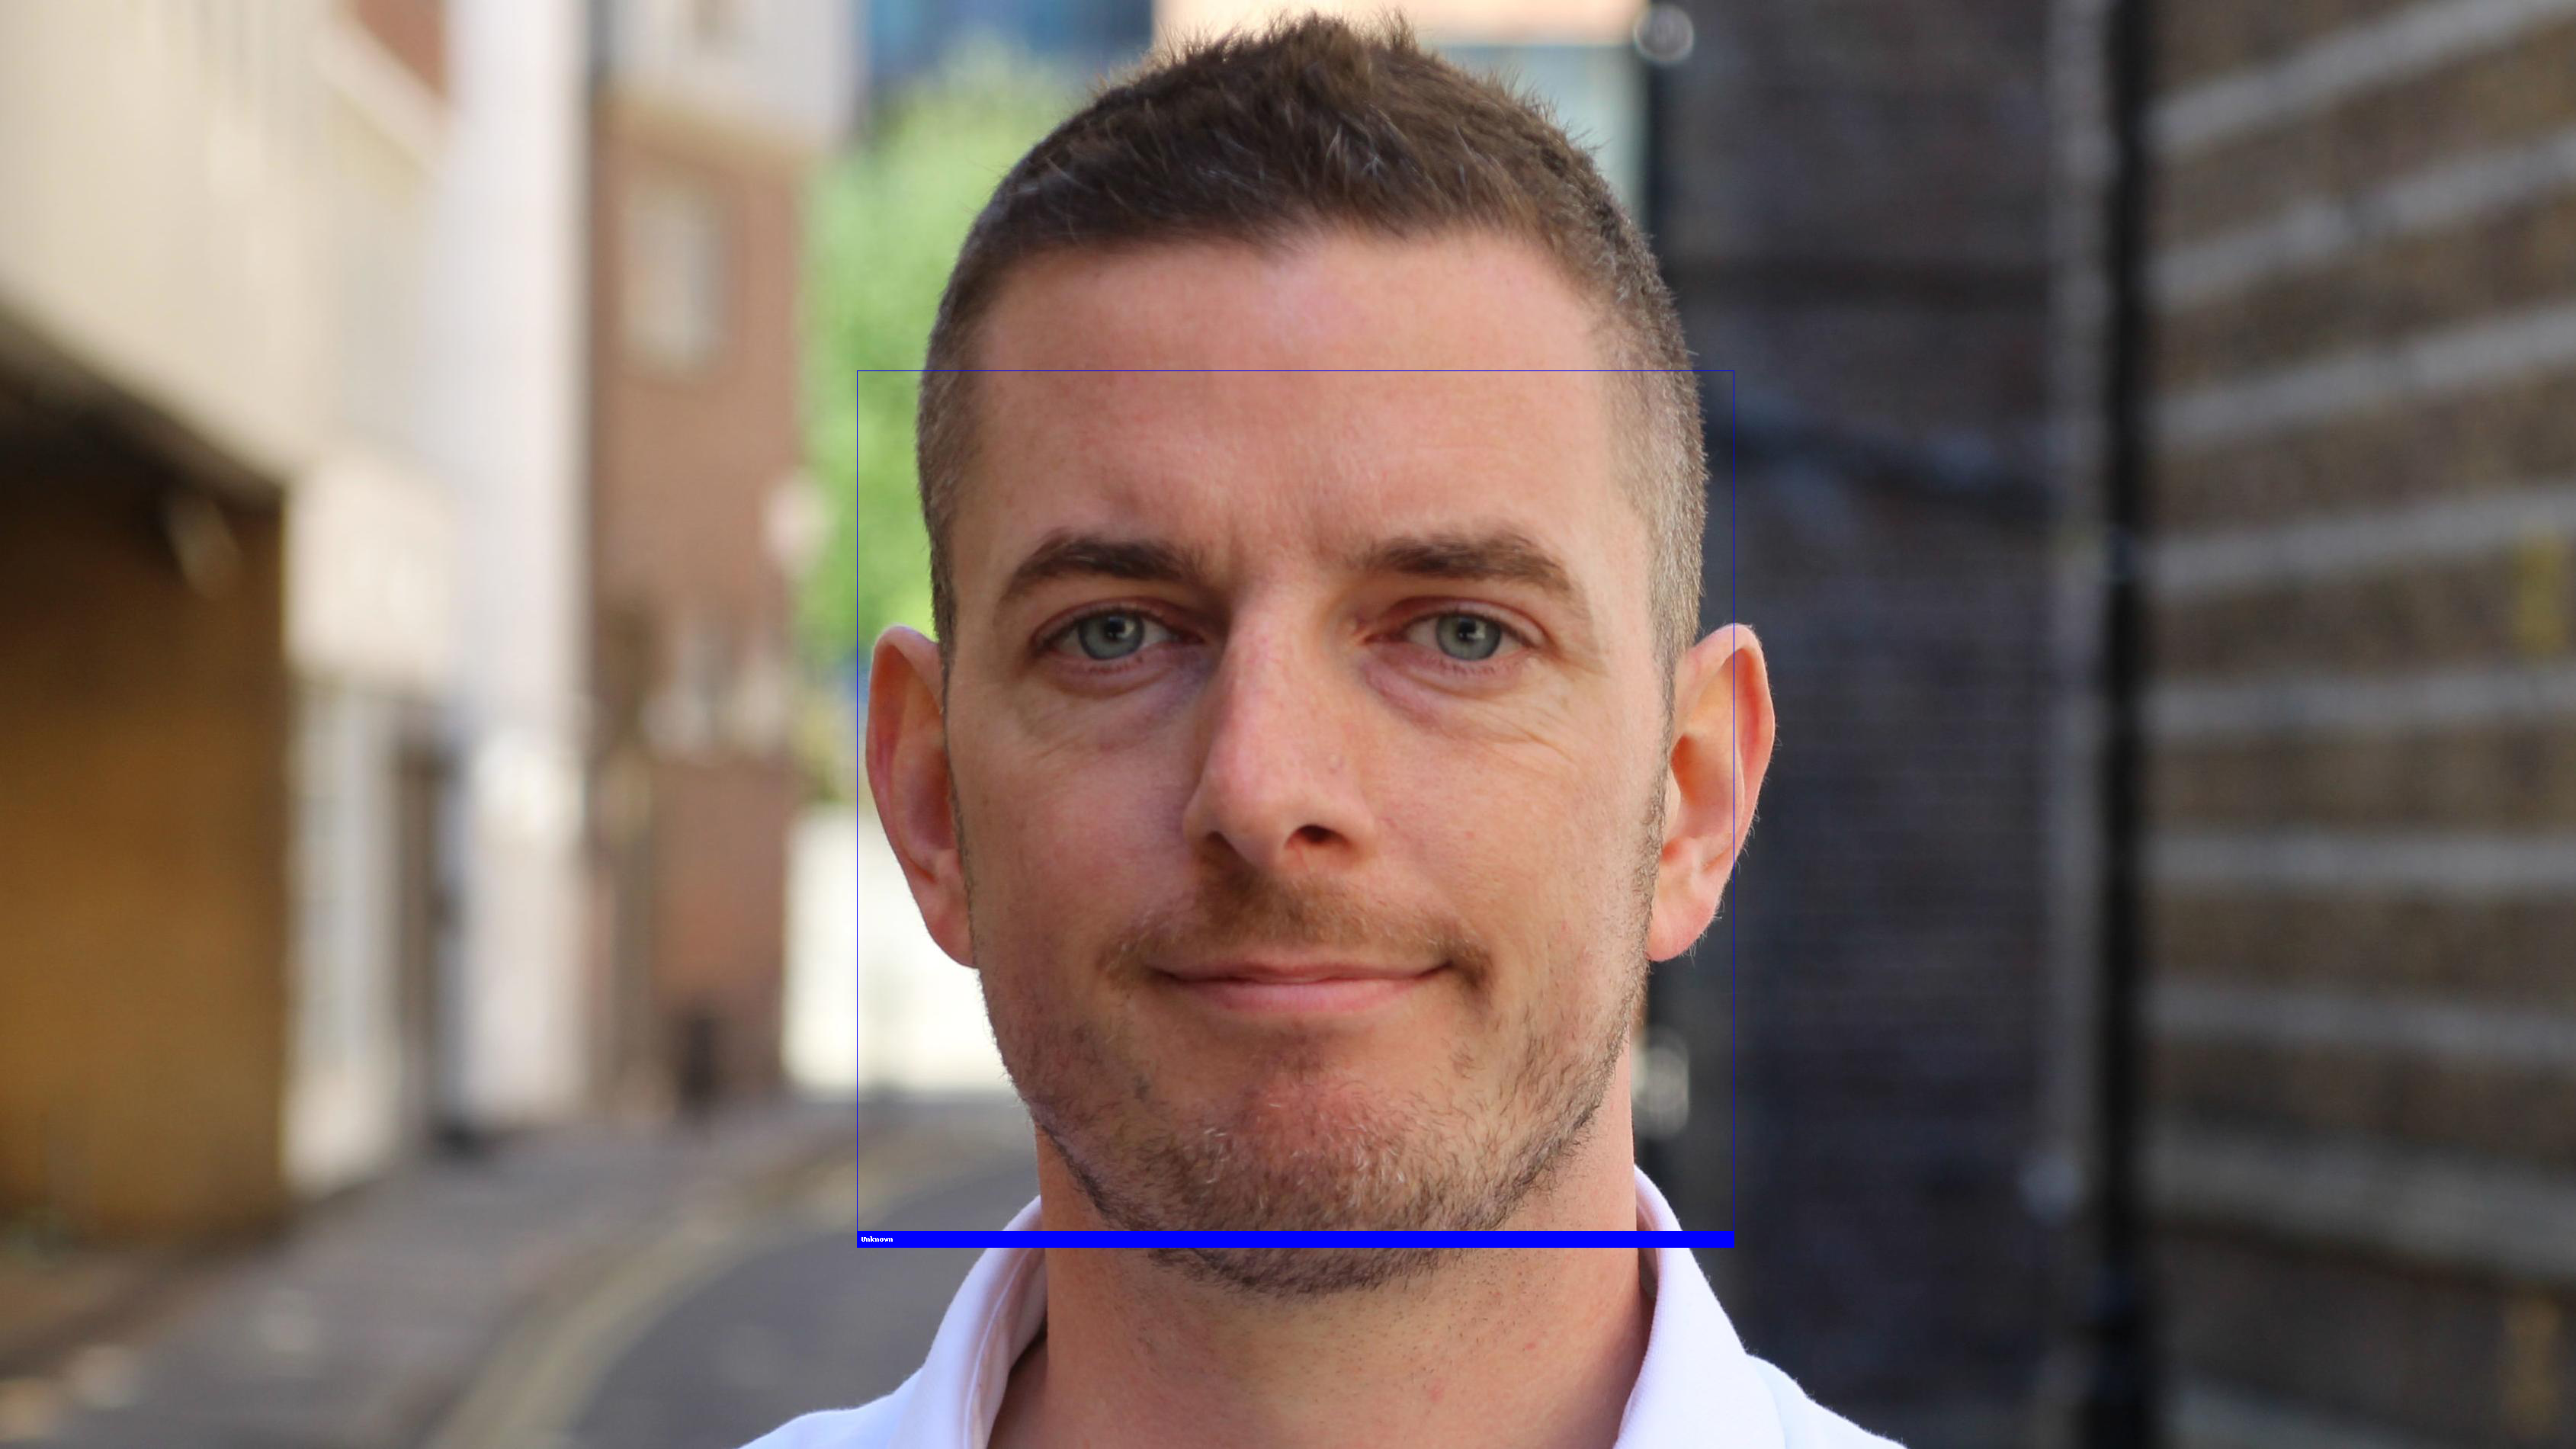

In [ ]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("idris_elba.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)